In [1]:
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D
import matplotlib.pyplot as plt
import cv2
import numpy as np

from readdata import train_generator, validation_generator, \
                     batchnum_train, batchnum_validation
                     
%matplotlib inline

Using TensorFlow backend.


['edgeright3_0.25', 'chy1', 'hardneg1', 'hardneg6', 'hardneg4', 'hardneg3', 'hardneg5', 'chy1r', 'data', 'hardneg2']


In [2]:
# set up cropping2D layer
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))
model.add(Conv2D(24, (5,5), strides=(2,2),activation="relu"))
model.add(Conv2D(36, (5,5), strides=(2,2),activation="relu"))
model.add(Conv2D(48, (5,5), strides=(2,2),activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

adam = optimizers.Adam(lr=0.00005)
model.load_weights("model2-10_data_chy1_chy1r.h5")

model.compile(loss='mse', optimizer=adam)

In [3]:
history_object = model.fit_generator(
    train_generator, 
    steps_per_epoch = batchnum_train,
    epochs=5,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = batchnum_validation, 
)


Epoch 1/5
229/229 [==============================] - 50s - loss: 0.0234 - val_loss: 0.0240

In [4]:
model.save('model2-11_data_chy1_chy1r.h5')

dict_keys(['val_loss', 'loss'])


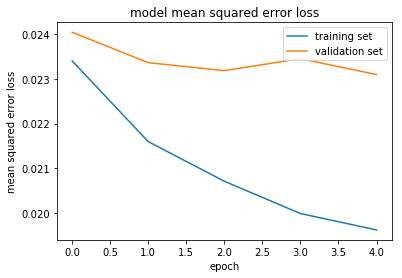

In [5]:

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()